# Import dataset

This notebook imports the selected trials from the [Temple database](../Data/Temple%20artifact%20data/) and returns only the selected channels
By default, the notebook imports one clean section of data, as well as all the eye movement and muscle artifacts.

In [3]:
# Import packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..") # Adds higher directory to python modules path.
from Functions import file_converters

notebook_dir = os.getcwd()  # Directory of current notebook
os.chdir('..')              # Go one folder up
data_dir = os.getcwd() + '\\Data'
os.chdir(notebook_dir)  # Return to current notebook directory

# - Save data
save_temple = True # Boolean to save data to .npz file
plot_imported = True   # Boolean to plot the imported data

# - Trials to import. Select trials as a list of strings        
trials = ['00000647_s002_t000', '00000768_s003_t000', '00000254_s007_t000']  # List of trials [.edf file type]
labels = ['labels_01_tcp_ar']    # List of labels [.csv file type]

## Import data

Import the selected trials

In [4]:
# Initialize list to store data
temple_data = [None]*len(trials)

# Import data from trials chosen
for t, trial in enumerate(trials):
    temp_trial = os.path.join(data_dir, trial)
    temp_label = os.path.join(data_dir, labels[0])
    temple_data[t] = file_converters.edf_to_npz(temp_trial, temp_label, save_file=save_temple, \
        save_name=trial, save_loc='', resample=False)


## Plot imported data

Plot imported data if `plot_imported = True`

### Clean data

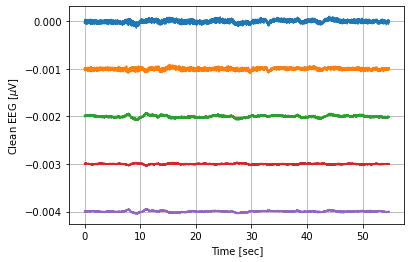

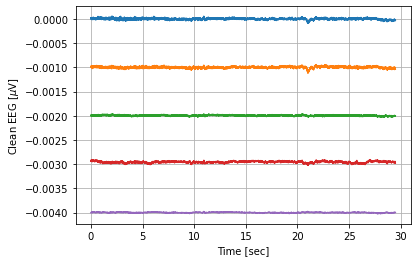

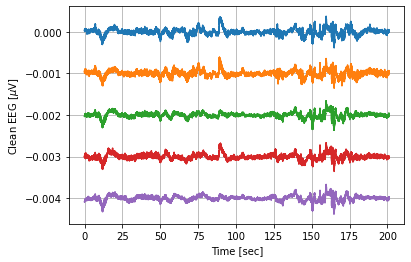

In [5]:
if plot_imported:
    n_channels = 5
    
    for t, trial in enumerate(temple_data):
        clean_data = trial[0][0:n_channels, :]
        srate = trial[3]
        clean_time = np.linspace(0, np.size(clean_data,1)/srate, np.size(clean_data,1))

        fig, ax = plt.subplots()
        offset = 1e-3

        for c in range(n_channels):
            ax.plot(clean_time, clean_data[c,:] - c*offset)

        ax.set_xlabel('Time [sec]')
        ax.set_ylabel('Clean EEG [$\mu$V]')
        ax.grid()

### Artifact data

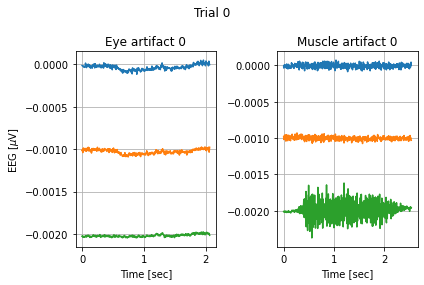

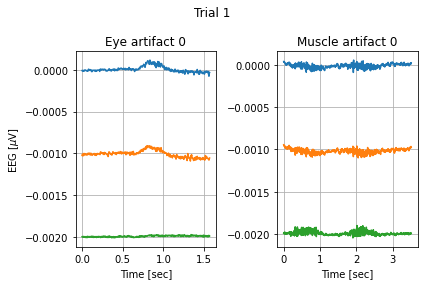

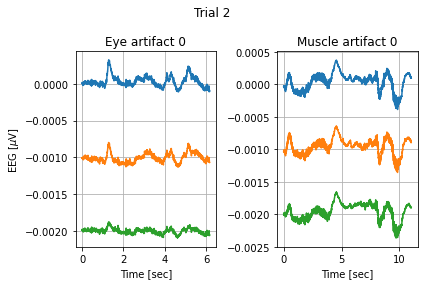

In [6]:
if plot_imported:
    n_channels = 3  # Number of channels to plot
    n_artifacts = 1 # Number of artifacts to plot
    for i, trial in enumerate(temple_data):
        for a in range(n_artifacts):
            # Eye movement artifact data
            eye_data = trial[1][a][0:n_channels,:]   # EEG eye artifact data [V]
            artifact_srate = trial[3]                   # Sampling rate [Hz]
            eye_time = np.linspace(0, np.size(eye_data,1)/artifact_srate, np.size(eye_data,1))

            # Muscle artifact data
            mus_data = trial[2][a][0:n_channels,:]
            mus_time = np.linspace(0, np.size(mus_data,1)/artifact_srate, np.size(mus_data,1))

            fig, ax = plt.subplots(1,2)
            fig.suptitle(f'Trial {i}')
            offset = 1e-3
            for c in range(n_channels):
                ax[0].plot(eye_time, eye_data[c,:] - c*offset)
                ax[1].plot(mus_time, mus_data[c,:] - c*offset)

            ax[0].set_title(f'Eye artifact {a}')
            ax[0].set_xlabel('Time [sec]')
            ax[0].set_ylabel('EEG [$\mu$V]')
            ax[0].grid()

            ax[1].set_title(f'Muscle artifact {a}')
            ax[1].set_xlabel('Time [sec]')
            ax[1].grid()

            fig.tight_layout()

## Next steps

Now that the data is imported into a `.npz` file, move to the [Artifacts and quality](./02_Artifacts_and_quality.ipynb) notebook to clean the data and calculate its EEG quality index